# Data preprocess

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os

tf.__version__

'2.5.0'

In [2]:
# import tarfile
# tar_train_val = tarfile.open('./data/VOCtrainval_06-Nov-2007.tar')
# tar_train_val.extractall('./data/')

In [3]:
def load_classes_from_txt(file_path):
    
    file_name = os.path.basename(file_path)
    
    class_name = file_name.split('_')[0]
    
    df = pd.read_csv(file_path, sep='\s+| |  ', engine='python', 
                     header=None)
    
    df.columns = ['file_name', class_name]
    
    df.loc[df[class_name]==-1, class_name] = 0
    
    return df
    

In [4]:
# data = load_classes_from_txt('./data/VOCdevkit/VOC2007/ImageSets/Main/aeroplane_train.txt')
# data.head()

In [5]:
# file_name = os.path.basename('./data/VOCdevkit/VOC2007/ImageSets/Main/aeroplane_train.txt')
# file_name.split('_')[0]

In [6]:
def get_dataframe_with_classes_in_images(folder_path, which_set='train'):
    
    '''
    Returns DataFrame with class annotations for every image in chosen set.
    
    Args:
        folder_path -- path to folder containing .txt files with labels
        which_set -- 'train', 'trainval', 'val', 'test'
    '''
    
    for root, _, files in os.walk(folder_path):
        pass
    
    # create dataframes with file name column 
    df_all_classes = pd.read_csv(f'{root}{which_set}.txt', header=None, dtype=str)
    df_all_classes.columns = ['file_name']
    
    # loops through all file names in the folder
    for file_name in files:
        
        # exclude txt files without information about class apperance in a image
        if file_name not in ['train.txt', 'trainval.txt', 'val.txt', 'test.txt']:
            
            #  get information which of dataset's splits the file relates to
            ds_part = file_name.split('_')[1]
            
            file_path = root + file_name
            
            # function for getting dataframe from txt file
            df = load_classes_from_txt(file_path=file_path)
         
            # check if annotations are for images of chosen set
            if ds_part==(which_set+'.txt'):
                
                # statment check if columns are equal before concatenation
                if not df_all_classes['file_name'].astype('int').equals(df['file_name']):
                    print('File name columns are not equal!')
                
                df_all_classes = pd.concat([df_all_classes, df.iloc[:, 1]], axis=1)
            
            else:
                pass
            

    # get column names exluding 'file_name'
    cols = df_all_classes.columns.tolist()[1:]
        
    cols.sort()
    
    cols.insert(0, 'file_name')
    
#     print(cols)

    # rearrange columns order
    df_all_classes = df_all_classes[cols]
           
    return df_all_classes



In [7]:
folder_path = './data/VOCdevkit/VOC2007/ImageSets/Main/'

df_train = get_dataframe_with_classes_in_images(folder_path, which_set='train')
df_trainval = get_dataframe_with_classes_in_images(folder_path, which_set='trainval')
df_val = get_dataframe_with_classes_in_images(folder_path, which_set='val')

test_path = './data/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/ImageSets/Main/'

df_test = get_dataframe_with_classes_in_images(test_path, 'test')

In [8]:
df_train

,file_name,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,...,diningtable,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor
0,000012,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000017,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,000023,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,000026,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000032,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,009944,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2497,009945,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2498,009949,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2499,009959,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_trainval

,file_name,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,...,diningtable,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor
0,000005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,000007,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000009,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,000012,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,009954,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
5007,009955,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5008,009958,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5009,009959,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_val

,file_name,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,...,diningtable,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor
0,000005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,000007,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000009,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,000016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000019,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,009947,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2506,009950,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2507,009954,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2508,009955,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_test

,file_name,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,...,diningtable,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor
0,000001,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,000002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,000003,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,000004,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000006,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4947,009956,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4948,009957,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4949,009960,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4950,009962,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Graphs

In [12]:
def display_graph_of_images_count(dataframe):
    
    ax = dataframe.plot(kind='bar', figsize=(20, 15), title='Images count per class',
                        xlabel='Class', ylabel='Count', legend=False, fontsize=12)
    
    ax.legend(fontsize=12)

    for i in range(len(dataframe.columns)):
        ax.bar_label(ax.containers[i], label_type='edge', rotation=90, fontsize=12, padding=3)

    ax.margins(y=0.1)

In [13]:

df_train_class_count = pd.DataFrame(df_train.sum().iloc[1:], columns=['train'])

df_val_class_count = pd.DataFrame(df_val.sum().iloc[1:], columns=['val'])

df_test_class_count = pd.DataFrame(df_test.sum().iloc[1:], columns=['test'])

# concat
df_class_count = pd.concat([df_train_class_count, df_val_class_count, df_test_class_count], axis=1)

# sum across train/val/test count
df_class_count['total']= df_class_count.sum(axis=1).astype('int')


In [14]:
df_class_count = df_class_count.sort_values(by=['total'], ascending=False)

In [15]:
df_class_count

,train,val,test,total
person,1025,983,2007,4015
car,376,337,721,1434
chair,224,221,417,862
dog,203,218,418,839
cat,163,174,322,659
bird,180,150,282,612
horse,139,148,274,561
train,127,134,259,520
tvmonitor,128,128,229,485
bicycle,116,127,239,482


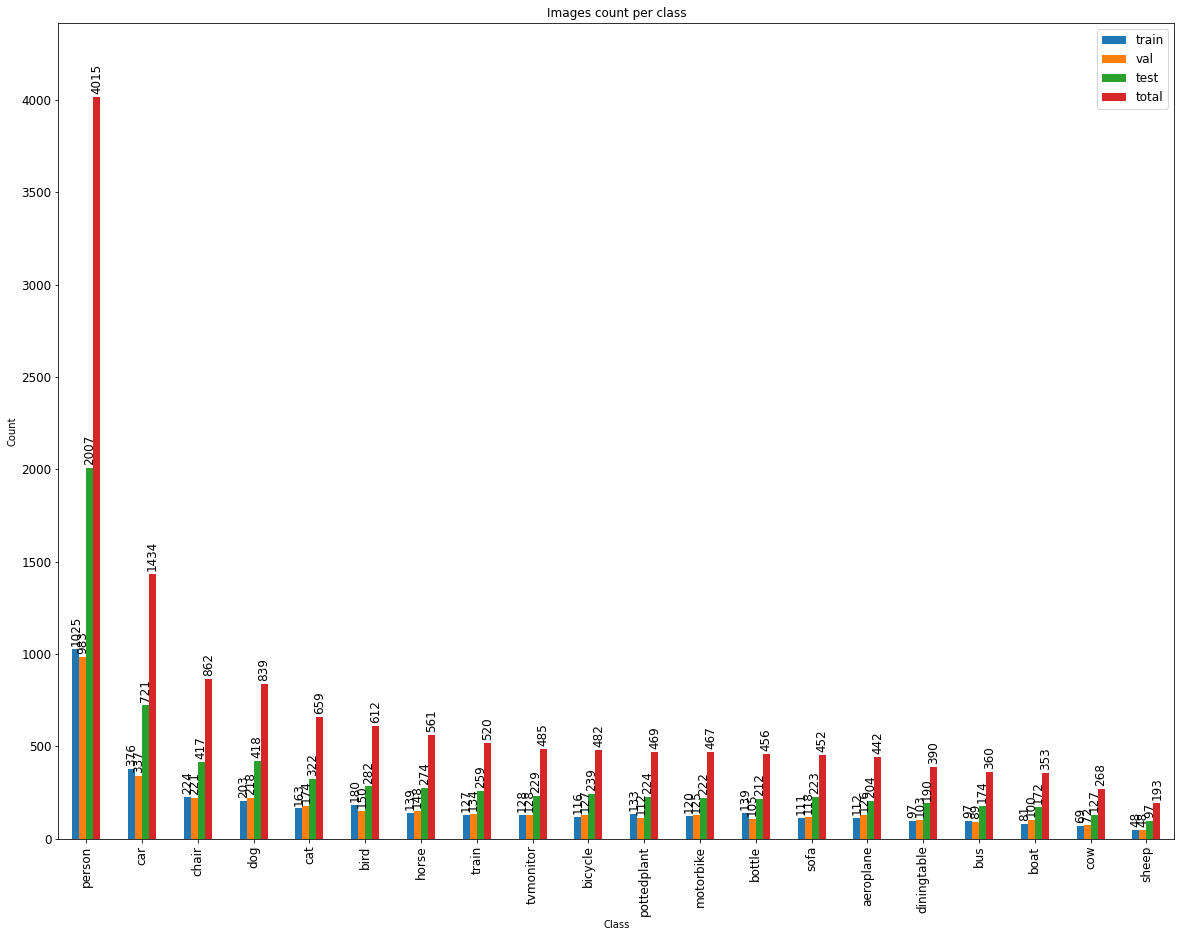

In [16]:
display_graph_of_images_count(df_class_count)

Most common class found in images by far is 'person'. Next are car, chair and dog.

The least amount of images depict sheeps with only 193 images in total of around 10k of images! Other classes are also not faring better. 

The distribution of class across train/val/test sets is almost equal. 
E.g.: Class 'person' appear in:
    
    * 1025 images in train set
    * 985 images in validation set
    * 2007 images in test set, which consists of 50% of all images

## Load images

In [17]:
# df_train.iloc[:, 1:]

In [18]:
# df_train.iloc[:, 0].loc[0]

In [19]:
# classes in image 000012.jpg
# ds = df_train.iloc[0, 1:]
# ds

In [20]:
# file_name = df_train.iloc[0, 0]
# file_name

In [21]:
classes = list(df_train.iloc[:, 1:])
NUM_CLASSES = len(classes)
classes

['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [22]:
# ds_as_list = list(ds)

In [23]:
# ds_as_list

In [24]:
# def to_categorical(labels_list, n_classes=NUM_CLASSES):
    
#     labels = []
    
#     for i, cls in enumerate(labels_list):
        
#         if cls == 1:
            
#             labels.append(i)
    
#     Y = tf.keras.utils.to_categorical(labels, n_classes)
    
#     Y = tf.one_hot(labels_list, n_classes)
    
#     return Y
    

In [25]:
def get_img_paths_labels(dataframe, images_folder_path): 
    
    '''
    Get lists of paths to images and their corresponding labels
    
    Args:
        dataframe: pandas dataframe
        images_folder_path: path to folder with images
    '''
    
    set_paths = []
    set_labels = []

    for i in range(len(dataframe)):

        path = f'{images_folder_path}{dataframe.iloc[i, 0]}.jpg'
        set_paths.append(path)

        set_labels.append(list(dataframe.iloc[i, 1:]))
        
    
    return set_paths, set_labels

## Create Dataset

In [82]:
IMG_SIZE = 384

CHANNELS = 3

BATCH_SIZE = 32

SHUFFLE_BUFFER_SIZE = 512

AUTOTUNE = tf.data.AUTOTUNE

In [83]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])


In [84]:
def parse_image(file_path, label):
    """
    Function that returns a tuple of normalized image array and labels array.
    
    Args:
        file_path: string representing path to image
        label: 0/1 one-dimensional array of size N_LABELS
    """
    
    # Read an image from a file
    image_string = tf.io.read_file(file_path)
    
    # Decode it into a dense vector
    image_decoded = tf.image.decode_jpeg(image_string, channels=CHANNELS)
    
    # Resize it to fixed shape
    image_resized = tf.image.resize(image_decoded, [IMG_SIZE, IMG_SIZE])
    
    # Normalize it from [0, 255] to [0.0, 1.0]
    image_normalized = image_resized / 255.0
    
    label = tf.cast(label, dtype=tf.float32)

    
    return image_normalized, label

In [85]:
def get_img_paths_and_labels(dataframe, images_folder_path): 
    
    '''
    Get lists of paths to images and their corresponding labels
    
    Args:
        dataframe: pandas dataframe
        images_folder_path: path to folder with images
    '''
    
    set_paths = []
    set_labels = []

    for i in range(len(dataframe)):

        path = f'{images_folder_path}{dataframe.iloc[i, 0]}.jpg'
        set_paths.append(path)

        set_labels.append(list(dataframe.iloc[i, 1:]))
    
    return set_paths, set_labels

In [86]:
def create_dataset(dataframe, images_folder_path, is_training=True):
    """
    Load and parse dataset.
    
    Args:
        dataframe: pandas dataframe
        images_folder_path: path to folder with images
        is_training: boolean to indicate training mode
    """
    
    filepaths, labels = get_img_paths_and_labels(dataframe, images_folder_path)
    
    # Create a first dataset of file paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((filepaths, labels))
    
    # Parse and preprocess observations in parallel
    dataset = dataset.map(parse_image, num_parallel_calls=AUTOTUNE)

    
    if is_training == True:
    
        # This is a small dataset, only load it once, and keep it in memory.
        dataset = dataset.cache()
        
        # Shuffle the data each buffer size
        dataset = dataset.shuffle(buffer_size=SHUFFLE_BUFFER_SIZE)
        
    # Batch the data for multiple steps
    dataset = dataset.batch(BATCH_SIZE)
    
    # Fetch batches in the background while the model is training.
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    
    return dataset

In [87]:
trainval_images_path = './data/VOCdevkit/VOC2007/JPEGImages/'
test_images_path = './data/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/'  

In [88]:
train_ds = create_dataset(df_train, trainval_images_path)
train_ds

<PrefetchDataset shapes: ((None, 384, 384, 3), (None, 20)), types: (tf.float32, tf.float32)>

In [89]:
val_ds = create_dataset(df_val, trainval_images_path)
test_ds = create_dataset(df_test, test_images_path)

# Deep learning model 

In [90]:
def best_val_acc_callback(filepath):
    
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)
    
    return checkpoint_callback

In [91]:
# conv_base = tf.keras.applications.InceptionResNetV2(weights='imagenet',
#                                                     include_top=False,
#                                                     input_shape=(IMG_SIZE, IMG_SIZE, 3))

# conv_base.trainable = False
# print("weights:", len(conv_base.weights))
# print("trainable_weights:", len(conv_base.trainable_weights))
# print("non_trainable_weights:", len(conv_base.non_trainable_weights))

In [92]:
import tensorflow_hub as hub

feature_extractor_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2"

conv_base = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(IMG_SIZE,IMG_SIZE,CHANNELS))

conv_base.trainable = False

In [93]:
model = tf.keras.models.Sequential([
       
#     data_augmentation,
    
    conv_base,
    
    layers.Flatten(),
    
    layers.Dense(1024, activation='relu'),
    
    layers.Dense(1024, activation='relu'),
    
    layers.Dense(512, activation='relu'),
 
    layers.Dense(NUM_CLASSES, activation='sigmoid', name='output')
])

model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1000)              21612360  
_________________________________________________________________
flatten_5 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              1025024   
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_17 (Dense)             (None, 512)               524800    
_________________________________________________________________
output (Dense)               (None, 20)                10260     
Total params: 24,222,044
Trainable params: 2,609,684
Non-trainable params: 21,612,360
__________________________________

In [94]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [95]:
EPOCHS = 20

# get callbacks
checkpoint_path = './saved_weights/flowers/voc2007_transfer_learning'

best_val_acc = best_val_acc_callback(checkpoint_path)

# callback for monitoring val_loss and for stopping in case of no improvement
# for example when overfitting occurs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)


In [96]:
# train model
history = model.fit(train_ds,
                   validation_data=val_ds,
                   epochs=EPOCHS,
                   callbacks=[best_val_acc, early_stopping])

Epoch 1/20
79/79 [==============================] - 51s 530ms/step - loss: 0.1847 - accuracy: 0.4342 - val_loss: 0.0845 - val_accuracy: 0.7112
Epoch 2/20
79/79 [==============================] - 39s 498ms/step - loss: 0.0692 - accuracy: 0.7473 - val_loss: 0.0683 - val_accuracy: 0.7542
Epoch 3/20
79/79 [==============================] - 39s 494ms/step - loss: 0.0519 - accuracy: 0.7669 - val_loss: 0.0627 - val_accuracy: 0.7629
Epoch 4/20
79/79 [==============================] - 39s 493ms/step - loss: 0.0411 - accuracy: 0.7845 - val_loss: 0.0627 - val_accuracy: 0.7590
Epoch 5/20
79/79 [==============================] - 39s 500ms/step - loss: 0.0326 - accuracy: 0.7925 - val_loss: 0.0620 - val_accuracy: 0.7685
Epoch 6/20
79/79 [==============================] - 39s 501ms/step - loss: 0.0257 - accuracy: 0.7893 - val_loss: 0.0641 - val_accuracy: 0.7701
Epoch 7/20
79/79 [==============================] - 39s 503ms/step - loss: 0.0205 - accuracy: 0.7877 - val_loss: 0.0660 - val_accuracy: 0.7606

# Model evaluation

In [97]:
# load best weights
model.load_weights(checkpoint_path)

In [98]:
model.evaluate(test_ds)

155/155 [==============================] - 44s 262ms/step - loss: 0.0628 - accuracy: 0.7827


[0.0628497451543808, 0.7827140688896179]

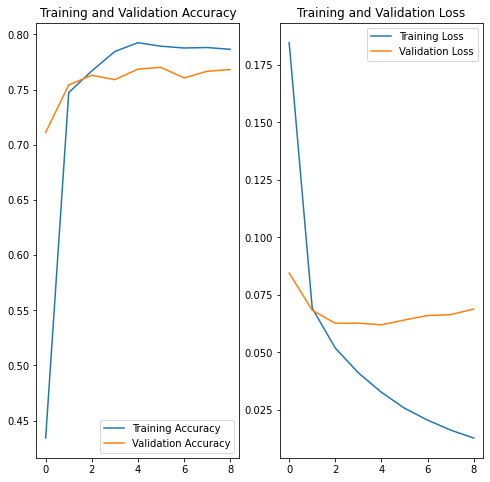

In [104]:
def display_plots(history_var, epochs=len(history.epoch)):
    acc = history_var.history['accuracy']
    val_acc = history_var.history['val_accuracy']

    loss = history_var.history['loss']
    val_loss = history_var.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    
    

display_plots(history)